In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='AppleGothic')
import warnings
warnings.filterwarnings("ignore")

## QGIS 지오메트리 연산을 이용하여 면적을 구하고, 실제 면적과 같게 하기 위해 10000을 곱하여 군집별 해당 면적을 구하였습니다. 그 후 '세종시_군집별_연도별_버스이용객.csv'에서 군집별로 나누고 군집별로 면적을 붙여주었습니다

### A군집의 제곱키로미터당 버스 정류장 개수

In [3]:
A군집_면적_버스정류장 = pd.read_csv('./군집화된_외부데이터/A군집_면적_버스정류장.csv')
B군집_면적_버스정류장 = pd.read_csv('./군집화된_외부데이터/B군집_면적_버스정류장.csv')
C군집_면적_버스정류장 = pd.read_csv('./군집화된_외부데이터/C군집_면적_버스정류장.csv')

In [4]:
A군집 = pd.pivot_table(A군집_면적_버스정류장, index = 'ADM_DR_NM', values = 'NODENM' , aggfunc = 'count').reset_index()

A군집_면적 = pd.pivot_table(A군집_면적_버스정류장, index = 'ADM_DR_NM', values = '면적').reset_index()

A군집['면적'] = A군집_면적['면적']

A군집_제곱키로미터당_버스정류장_개수 = sum(A군집.NODENM) /sum(A군집.면적)

In [15]:
A군집_제곱키로미터당_버스정류장_개수

6.222477093666675

### B군집의 제곱키로미터당 버스 정류장 개수

In [16]:
B군집 = pd.pivot_table(B군집_면적_버스정류장, index = 'ADM_DR_NM', values = 'NODENM' , aggfunc = 'count').reset_index()

In [17]:
B군집_면적 = pd.pivot_table(B군집_면적_버스정류장, index = 'ADM_DR_NM', values = '면적').reset_index()

In [18]:
B군집['면적'] = B군집_면적['면적']

In [19]:
B군집_제곱키로미터당_버스정류장_개수 = sum(B군집.NODENM) /sum(B군집.면적)

In [20]:
B군집_제곱키로미터당_버스정류장_개수

2.5631367038717587

### C군집 제곱키로미터당 버스 정류장 개수

In [21]:
C군집 = pd.pivot_table(C군집_면적_버스정류장, index = 'ADM_DR_NM', values = 'NODENM' , aggfunc = 'count').reset_index()

In [22]:
C군집_면적 = pd.pivot_table(C군집_면적_버스정류장, index = 'ADM_DR_NM', values = '면적').reset_index()

In [23]:
C군집['면적'] = C군집_면적['면적']

In [24]:
C군집_제곱키로미터당_버스정류장_개수 = sum(C군집.NODENM) /sum(C군집.면적)

In [25]:
C군집_제곱키로미터당_버스정류장_개수

17.85131658474228

## 군집별로 비교

In [26]:
ABC = ['A','B','C']
value = [A군집_제곱키로미터당_버스정류장_개수,B군집_제곱키로미터당_버스정류장_개수,C군집_제곱키로미터당_버스정류장_개수]

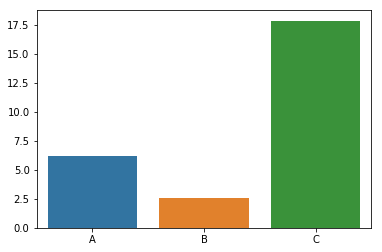

In [27]:
sns.barplot(ABC,value);

### 군집별_제곱키로미터당_버스정류장개수 저장

In [33]:
data = {'A군집_제곱키로미터당_버스정류장_개수': [A군집_제곱키로미터당_버스정류장_개수],
        'B군집_제곱키로미터당_버스정류장_개수' : [B군집_제곱키로미터당_버스정류장_개수],
        'C군집_제곱키로미터당_버스정류장_개수' : [C군집_제곱키로미터당_버스정류장_개수]}

군집별_제곱키로미터당_버스정류장개수 = pd.DataFrame(data)

In [34]:
군집별_제곱키로미터당_버스정류장개수

,A군집_제곱키로미터당_버스정류장_개수,B군집_제곱키로미터당_버스정류장_개수,C군집_제곱키로미터당_버스정류장_개수
0,6.222477,2.563137,17.851317


In [35]:
군집별_제곱키로미터당_버스정류장개수.to_csv('./군집화된_외부데이터/군집별_제곱키로미터당_버스정류장개수.csv', index = False)